<a href="https://colab.research.google.com/github/tkasod2/TIL/blob/main/zerobase/study/%EC%8B%A4%EC%A0%84_%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8_2_%EC%9C%A0%EC%A0%80_%EA%B5%B0%EC%A7%91_%EB%B6%84%EC%84%9D%ED%95%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

다양한 클러스터링 방법을 통해 유저 세그먼트 나눠보자

# 라이브러리 불러오기

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import colors

# 👣 데이터 살펴보기

In [ ]:
# 나의 구글 드라이브를 mount (colaboratory 노트북이 떠있는 위치에서 드라이브의 파일에 접근할 수 있게 만드는 것) 하는 명령어
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 판다스로 데이터 불러오기
# 아래에 customer_personality_analysis.csv 가 있는 경로로 이동합니다
# 경로 설정
# DRIVE_PATH = "/content/drive/MyDrive/" # 내 드라이브의 경로이다
# FILE_PATH_IN_MY_DRIVE = "zerobase/part1_user_analysis/project_2_clustering/data/customer_personality_analysis.csv" # 내 드라이브 내 파일이 있는 경로
# PATH = DRIVE_PATH +  FILE_PATH_IN_MY_DRIVE
PATH = "/content/drive/MyDrive/zerobase_2부/Part 1. 우리 서비스에 어떤 유저가 있어요_ - 유저 데이터 분석/Project_2_실전 프로젝트 2. 유저 군집 분석하기/data/customer_personality_analysis.csv"
df = pd.read_csv(PATH , sep="\t") # csv 파일 읽어오기
df.head()

# ID,Year_Birth,Education
# ID\tYear\t

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [ ]:
print("데이터 전체의 행 수: ",len(df))
print("데이터 컬럼 수: ",len(df.columns))

데이터 전체의 행 수:  2240
데이터 컬럼 수:  29


## 데이터 컬럼 종류

### People (사람)

- ID: Customer's unique identifier
- Year_Birth: Customer's birth year
- Education: Customer's education level (교육 수준)
- Marital_Status: Customer's marital status (결혼 상태)
- Income: Customer's yearly household income
- Kidhome: Number of children in customer's household (어린 아이의 수)
- Teenhome: Number of teenagers in customer's household (10대 수)
- Dt_Customer: Date of customer's enrollment with the company (서비스 가입 날짜)
- Recency: Number of days since customer's last purchase (마지막으로 구매한 날로부터 얼마가 지났는지)
- Complain: 1 if customer complained in the last 2 years, 0 otherwise

### Products (상품)

- MntWines: Amount spent on **wine** in last 2 years
- MntFruits: Amount spent on **fruits** in last 2 years
- MntMeatProducts: Amount spent on **meat** in last 2 years
- MntFishProducts: Amount spent on **fish** in last 2 years
- MntSweetProducts: Amount spent on **sweets** in last 2 years
- MntGoldProds: Amount spent on **gold** in last 2 years

### Promotion (프로모션)

- NumDealsPurchases: Number of purchases made with a discount (할인 받아 구매한 수)
- AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

### Place (구매 장소)

- NumWebPurchases: Number of purchases made through the company’s web site
- NumCatalogPurchases: Number of purchases made using a catalogue
- NumStorePurchases: Number of purchases made directly in stores
- NumWebVisitsMonth: Number of visits to company’s web site in the last month

# 👣 데이터 정제하기: Cleaning

- 결측치 (Missing Values)와 이상치 (Outliers) 를 제거하자
- 데이터를 바로 사용할 수 있으면 좋겠지만, 바로 사용할 수 있는 경우가 많지 않다.
    - 결측치가 있을 수 있고, 컴퓨터가 이해할 수 있는 형태 (숫자형)으로 바꿔주어야 하는 경우도 있다.
    - Outlier 가 너무 크다면, 이상치로 인해 모델이 왜곡될 수 있다.


아래 데이터를 살펴보자

In [ ]:
# .info() 함수는 데이터에 대한 전반적인 정보를 나타냅니다. 
# df를 구성하는 행과 열의 크기, 컬럼명, 컬럼을 구성하는 값의 자료형 등을 출력해줍니다.
df.info()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

- 4 Income : non-null인 row의 수는 2216 개 - 비어있는 값이 24개 정도 있다.
- 7 Dt_Customer : 날짜형이지만 날짜가 아닌 String(object) 로 표시되어 있다.

**결측치 제거하기**
- 결측치를 제거하는 방법은 크게 3가지이다.
    - 결측치의 비중이 작다면 제거한다.
    - 결측치를 빈도가 가장 높은 값이나 평균으로 채운다.
    - 결측치를 예측하는 모델을 만들어 예측값으로 채운다.
- 해당 데이터에서는 24개로 결측치가 많지 않기 때문에 제거한다.

In [ ]:
# missing value 가 있는 row 를 제거한다.
# 결측치가 있는 경우 1. 평균치로 채우거나 2. 예측하거나 3. 데이터가 많지 않으면 제거한다.
df = df.dropna()
len(df)

2216

**날짜 데이터 정제하기**
- 가입한지 얼마 되지 않은 고객과 가장 오래된 고객을 구해보자

In [ ]:
# string으로 된 date 를 datetime 함수를 쓰기 위해 datetime 형태로 바꾼다.
# Dt_Customer: 가입한 날짜
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"])

In [ ]:
for i in df["Dt_Customer"][:5]:
  print(i.date(), type(i.date()))

2012-04-09 <class 'datetime.date'>
2014-08-03 <class 'datetime.date'>
2013-08-21 <class 'datetime.date'>
2014-10-02 <class 'datetime.date'>
2014-01-19 <class 'datetime.date'>


In [ ]:
dates = []
for i in df["Dt_Customer"]:
    i = i.date()
    dates.append(i)  

In [ ]:
print(dates)
print(max(dates))
print(min(dates))


[datetime.date(2012, 4, 9), datetime.date(2014, 8, 3), datetime.date(2013, 8, 21), datetime.date(2014, 10, 2), datetime.date(2014, 1, 19), datetime.date(2013, 9, 9), datetime.date(2012, 11, 13), datetime.date(2013, 8, 5), datetime.date(2013, 6, 6), datetime.date(2014, 3, 13), datetime.date(2012, 11, 13), datetime.date(2013, 11, 15), datetime.date(2013, 11, 15), datetime.date(2012, 10, 10), datetime.date(2012, 11, 24), datetime.date(2012, 12, 24), datetime.date(2012, 8, 31), datetime.date(2013, 3, 28), datetime.date(2012, 3, 11), datetime.date(2012, 8, 8), datetime.date(2013, 6, 1), datetime.date(2012, 12, 23), datetime.date(2014, 11, 1), datetime.date(2013, 3, 18), datetime.date(2013, 2, 1), datetime.date(2013, 5, 27), datetime.date(2013, 5, 31), datetime.date(2013, 11, 22), datetime.date(2014, 5, 22), datetime.date(2013, 11, 5), datetime.date(2012, 10, 10), datetime.date(2012, 10, 29), datetime.date(2013, 2, 20), datetime.date(2013, 8, 29), datetime.date(2013, 12, 31), datetime.date(2

* 날짜를 숫자로! 가입 날짜(date)를 가입한 후 지난 일수(int)로 바꿔준다. 

In [ ]:
x = pd.DataFrame()


In [ ]:
df['Dt_Customer2'] = max(df['Dt_Customer'])
df['Dt_Customer3'] = df['Dt_Customer2'] - df['Dt_Customer']
df

del df['Dt_Customer2']
del df['Dt_Customer3']

In [ ]:
days = [] # 데이터를 담을 수 있는 빈 list
recent_date = max(dates) # 2014-12-06, 
# 가장 최근 가입일 (해당 날짜를 기준으로 기존 날짜의 값을 빼준다.)
for date in dates:
    day_difference = recent_date - date
    days.append(day_difference)
df["Customer_For"] = days

In [ ]:
df["Customer_For"].head()

0   971 days
1   125 days
2   472 days
3    65 days
4   321 days
Name: Customer_For, dtype: timedelta64[ns]

In [ ]:
# 날짜를 숫자로 type 을 변경해준다
df["Customer_For"] = pd.to_numeric(df["Customer_For"], errors="coerce")
df
# errors: error는 총 3개의 옵션이 존재합니다.
# errors = 'ignore' -> 만약 숫자로 변경할 수 없는 데이터라면 숫자로 변경하지 않고 원본 데이터를 그대로 반환합니다.
# errors = 'coerce' -> 만약 숫자로 변경할 수 없는 데이터라면 기존 데이터를 지우고 NaN으로 설정하여 반환합니다.
# errors = 'raise' -> 만약 숫자로 변경할 수 없는 데이터라면 에러를 일으키며 코드를 중단합니다.

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Customer_For
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,83894400000000000
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,10800000000000000
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,40780800000000000
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,5616000000000000
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,27734400000000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0,46742400000000000
2236,4001,1946,PhD,Together,64014.0,2,1,2014-10-06,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0,5270400000000000
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0,27216000000000000
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0,27302400000000000


**카테고리 데이터 정리하기**
- 앞에서 본 데이터 중 카테고리 형태의 데이터는 Education 과 Marital_Status :)

In [ ]:
df[['Education', 'Marital_Status']].head(10)

,Education,Marital_Status
0,Graduation,Single
1,Graduation,Single
2,Graduation,Together
3,Graduation,Together
4,PhD,Married
5,Master,Together
6,Graduation,Divorced
7,PhD,Married
8,PhD,Together
9,PhD,Together


In [ ]:
df["Marital_Status"].value_counts()

Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
YOLO          2
Absurd        2
Name: Marital_Status, dtype: int64

In [ ]:
df["Education"].value_counts()

Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: Education, dtype: int64

In [ ]:
# Marital_Status 정리하기, 파트너와 같이 사는지, 혼자사는지 여부
df["Living_With"]=(
    df["Marital_Status"]
    .replace(
      {"Married":"Partner", 
       "Together":"Partner", 
       "Absurd":"Alone", 
       "Widow":"Alone", 
       "YOLO":"Alone", 
       "Divorced":"Alone", 
       "Single":"Alone"
    })
)

# the number of children, Kidhome 과 Teenhome 을 분리하지 않고 합쳐준다.
df["Children"]=df["Kidhome"]+df["Teenhome"]

# 위의 데이터를 통해 가족 사이즈도 구할 수 있다.
df["Family_Size"] = (
    df["Living_With"].replace({"Alone": 1, "Partner":2})
    + df["Children"]
)

# 아이가 있는지, 없는지
df["Is_Parent"] = np.where(df.Children> 0, 1, 0)

In [ ]:
np.where(df.Children> 0, 1, 0)

array([0, 1, 0, ..., 0, 1, 1])

In [ ]:
# 교육 상태 정리하기
df["Education"]=df["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})

In [ ]:
# 생년 월일을 통해 나이를 구할 수 있다.
df["Age"] = 2021-df["Year_Birth"]

# 다양한 잡화 구매를 더해서 총 사용한 비용 Spent 를 구한다.
df["Spent"] = df["MntWines"]+ df["MntFruits"]+ df["MntMeatProducts"]+ df["MntFishProducts"]+ df["MntSweetProducts"]+ df["MntGoldProds"]


In [ ]:
# 모두 동일한 값, 필요없는 컬럼
df.Z_CostContact.value_counts() # 모든값이 3
df.Z_Revenue.value_counts() # 모든값이 11

11    2216
Name: Z_Revenue, dtype: int64

In [ ]:
# 컬럼명 짧게 변경
df=df.rename(columns={"MntWines": "Wines","MntFruits":"Fruits","MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"Gold"})

# 중복되거나 필요없는 컬럼 제거
to_drop = ["Marital_Status", "Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth", "ID"]
df = df.drop(to_drop, axis=1)

In [ ]:
df.head()

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Customer_For,Living_With,Children,Family_Size,Is_Parent,Age,Spent
0,Graduate,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,83894400000000000,Alone,0,1,0,64,1617
1,Graduate,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,10800000000000000,Alone,2,3,1,67,27
2,Graduate,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,40780800000000000,Partner,0,2,0,56,776
3,Graduate,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,5616000000000000,Partner,1,3,1,37,53
4,Postgraduate,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,27734400000000000,Partner,1,3,1,40,422


 **Outlier 제거하기**

우리가 정리한 데이터를 다시 한 번 살펴보자

In [ ]:
df.describe()

,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Customer_For,Children,Family_Size,Is_Parent,Age,Spent
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2.216000e+03,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253,2.323556,4.085289,2.671029,5.800993,5.319043,0.073556,0.074007,0.073105,0.064079,0.013538,0.009477,0.150271,4.423735e+16,0.947202,2.592509,0.714350,52.179603,607.075361
std,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414,1.923716,2.740951,2.926734,3.250785,2.425359,0.261106,0.261842,0.260367,0.244950,0.115588,0.096907,0.357417,2.008532e+16,0.749062,0.905722,0.451825,11.985554,602.900476
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1.000000,0.000000,25.000000,5.000000
25%,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.937600e+16,0.000000,2.000000,0.000000,44.000000,69.000000
50%,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.432320e+16,1.000000,3.000000,1.000000,51.000000,396.500000
75%,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.927040e+16,1.000000,3.000000,1.000000,62.000000,1048.000000
max,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9.184320e+16,3.000000,5.000000,1.000000,128.000000,2525.000000


Income 과 Age 의 Max 를 보자. Outlier 가 숨어있는 것 같다!

In [ ]:
df['Age'].quantile(0.99)

76.0

Reletive Plot Of Some Selected Features: A Data Subset


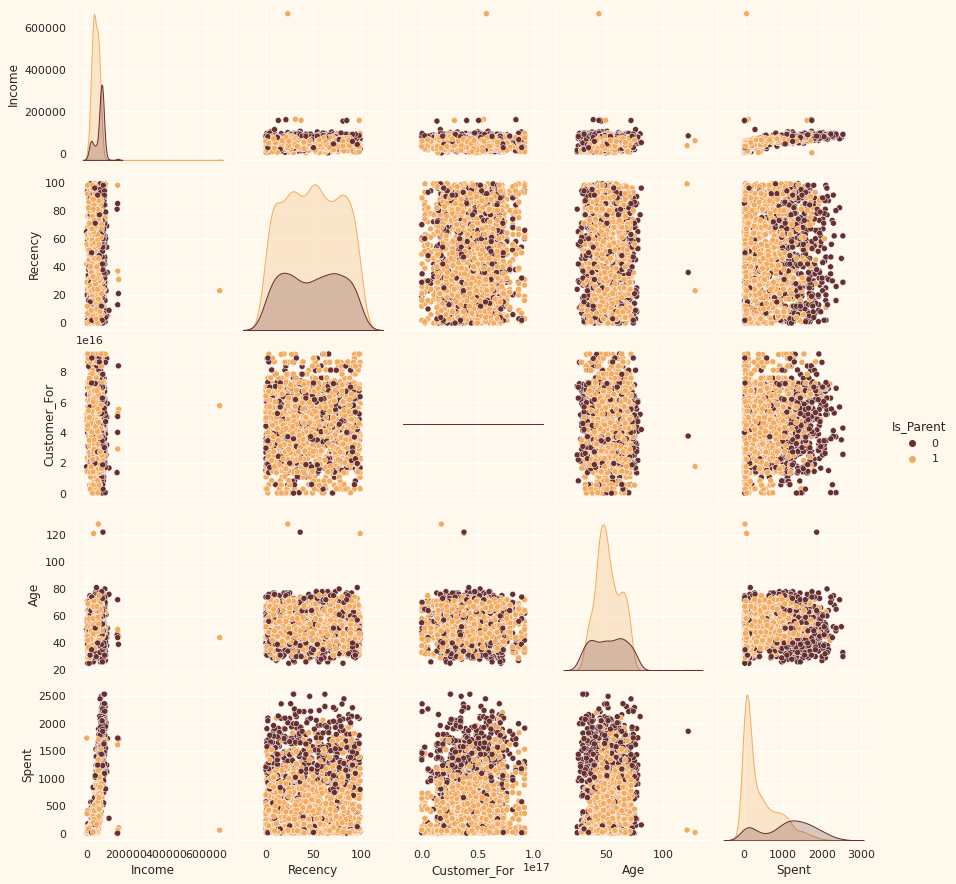

In [ ]:
# 색상 지정
sns.set(rc={"axes.facecolor":"#FFF9ED","figure.facecolor":"#FFF9ED"})
pallet = ["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"]
cmap = colors.ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])

# 아래의 정해진 컬럼들 사이의 상관관계를 그래프로 확인해 본다.
To_Plot = [ "Income", "Recency", "Customer_For", "Age", "Spent", "Is_Parent"]
print("Reletive Plot Of Some Selected Features: A Data Subset")
sns.pairplot(df[To_Plot], hue= "Is_Parent", palette=(["#682F2F","#F3AB60"]))

In [ ]:
# Dropping the outliers by setting a cap on Age and income. 
df = df[(df["Age"]< 90)]
df = df[(df["Income"] < 600000)]
print("Outlier 제거 후 데이터 row 수:", len(df))


# box plot 이나 분포를 보고도 알 수 있음.

Outlier 제거 후 데이터 row 수: 2212





----
⏰ "상관계수" 수업 시작

## 💡 Correlation Coefficients

- correlation (상관성)이란?
  - 상관성은 두 변수간의 “선형적” 관계의 정도를 의미
  - -1 ~ 1 사이를 가지며 1에 가까울 수록 양의 선형관계, -1에 가까울 수록 음의 선형관계가 강하다는 것을 의미

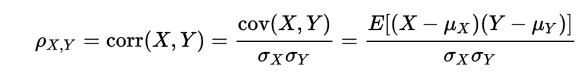

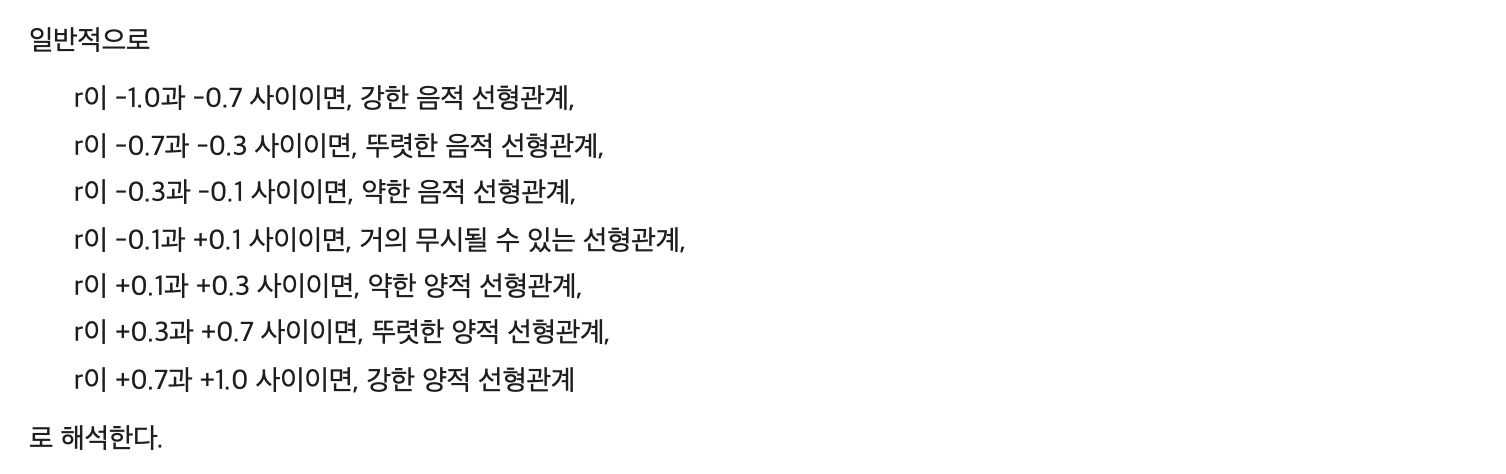

In [ ]:
df.corr()

,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Customer_For,Children,Family_Size,Is_Parent,Age,Spent
Income,1.000000,-0.514523,0.034565,0.007965,0.688209,0.507354,0.692279,0.520040,0.523599,0.388299,-0.108207,0.459265,0.696589,0.631424,-0.650257,-0.015152,0.219633,0.395569,0.327524,0.104036,-0.027900,0.161387,-0.027892,-0.343529,-0.286638,-0.403132,0.199977,0.792740
Kidhome,-0.514523,1.000000,-0.039066,0.010623,-0.497203,-0.373258,-0.439031,-0.388643,-0.377843,-0.354922,0.216594,-0.372327,-0.504598,-0.501863,0.447258,0.016135,-0.162111,-0.204582,-0.174261,-0.081911,0.037067,-0.077901,-0.057731,0.688081,0.583250,0.520355,-0.237497,-0.557949
Teenhome,0.034565,-0.039066,1.000000,0.014392,0.003945,-0.175905,-0.261134,-0.205235,-0.163107,-0.018579,0.386805,0.162239,-0.112477,0.049212,0.130985,-0.042797,0.038168,-0.190119,-0.145198,-0.015633,0.007746,-0.154402,0.008986,0.698199,0.594481,0.587993,0.361932,-0.137964
Recency,0.007965,0.010623,0.014392,1.000000,0.015981,-0.005257,0.022914,0.000788,0.025244,0.018148,0.002591,-0.005680,0.024197,-0.000460,-0.018965,-0.032361,0.017520,0.000233,-0.021147,-0.001429,0.005713,-0.200114,0.030748,0.018062,0.014717,0.002189,0.015694,0.020479
Wines,0.688209,-0.497203,0.003945,0.015981,1.000000,0.385844,0.568081,0.396915,0.389583,0.391461,0.009117,0.553663,0.634237,0.640219,-0.321616,0.061360,0.373349,0.472889,0.351610,0.206309,-0.036420,0.246320,0.148745,-0.353356,-0.296702,-0.341994,0.164615,0.892996
Fruits,0.507354,-0.373258,-0.175905,-0.005257,0.385844,1.000000,0.546740,0.593038,0.571474,0.393459,-0.134191,0.302301,0.485611,0.459875,-0.417741,0.014644,0.006598,0.208990,0.192417,-0.009924,-0.002956,0.123007,0.059828,-0.395161,-0.341414,-0.410657,0.013447,0.612129
Meat,0.692279,-0.439031,-0.261134,0.022914,0.568081,0.546740,1.000000,0.572986,0.534624,0.357556,-0.121128,0.306841,0.733787,0.486349,-0.539194,0.018416,0.091677,0.375252,0.313379,0.043549,-0.021017,0.237966,0.071381,-0.504176,-0.429948,-0.574147,0.033622,0.845543
Fish,0.520040,-0.388643,-0.205235,0.000788,0.396915,0.593038,0.572986,1.000000,0.583484,0.426299,-0.143147,0.299428,0.532241,0.457885,-0.446151,-0.000276,0.016058,0.194793,0.261712,0.002322,-0.019098,0.108135,0.078042,-0.427482,-0.363522,-0.449596,0.041154,0.641884
Sweets,0.523599,-0.377843,-0.163107,0.025244,0.389583,0.571474,0.534624,0.583484,1.000000,0.356754,-0.121395,0.333608,0.494623,0.455150,-0.422289,0.001660,0.029206,0.258417,0.245113,0.010142,-0.020569,0.116059,0.076345,-0.389152,-0.330705,-0.402064,0.021516,0.606652
Gold,0.388299,-0.354922,-0.018579,0.018148,0.391461,0.393459,0.357556,0.426299,0.356754,1.000000,0.053047,0.407873,0.441656,0.390693,-0.245973,0.125557,0.024305,0.176628,0.170853,0.050976,-0.030166,0.141096,0.145632,-0.267776,-0.235826,-0.245380,0.059779,0.527101


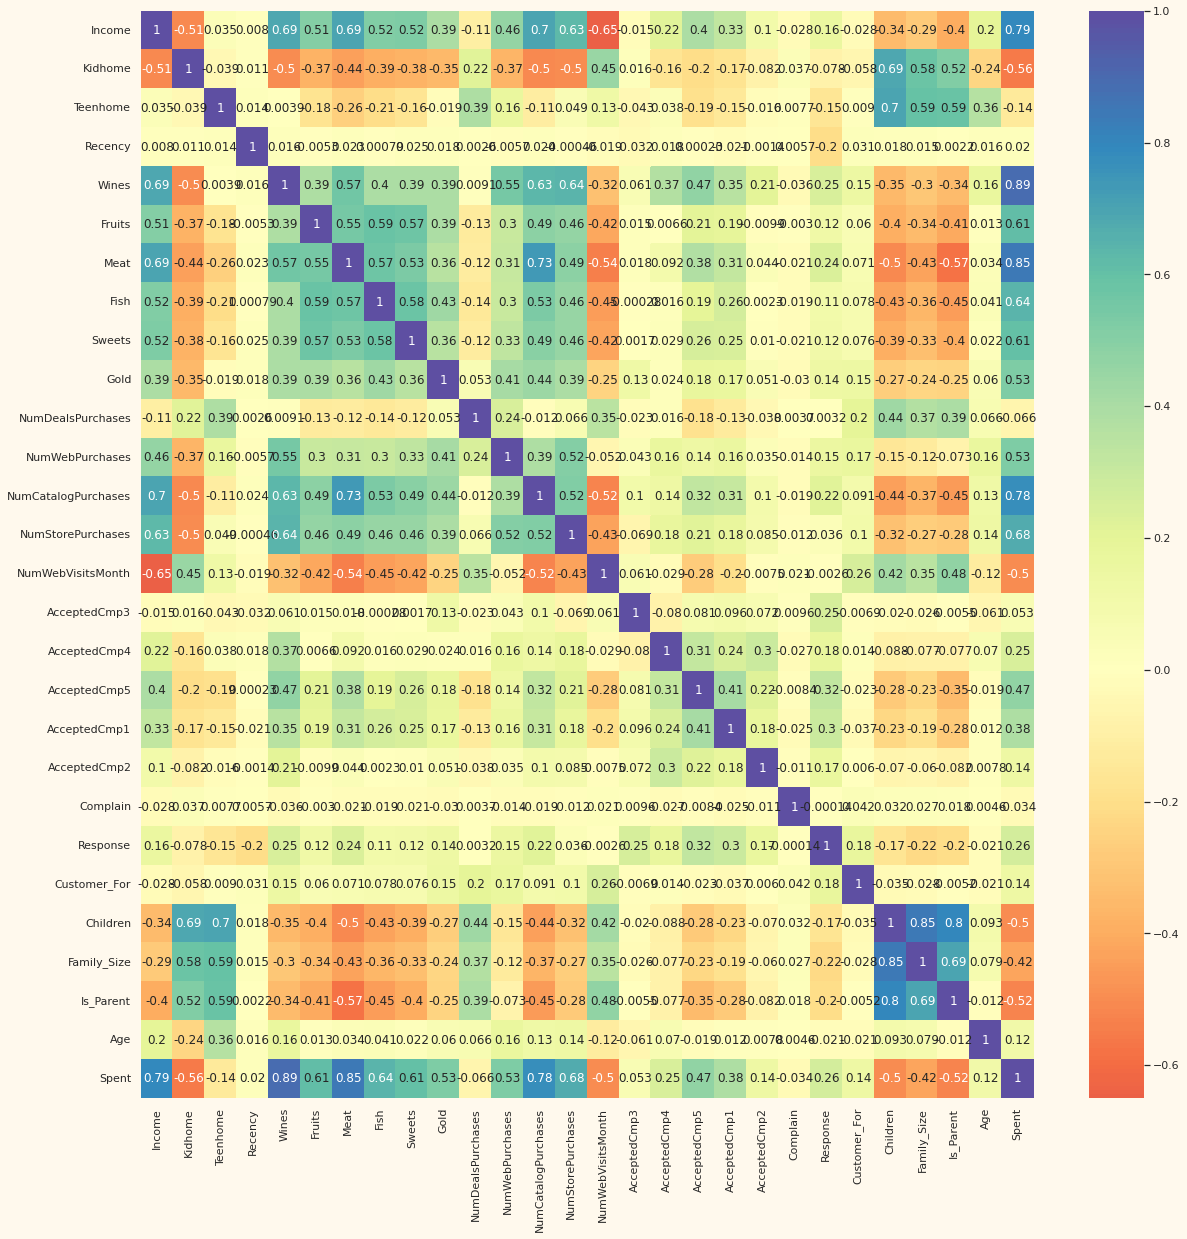

In [ ]:
# correlation matrix 히트맵으로 표현하기
corrmat= df.corr()
plt.figure(figsize=(20,20))  
sns.heatmap(corrmat, annot=True, cmap="Spectral", center=0)

----
⏰ "데이터 전처리하기: Preprocessing" 수업 시작

# 👣 데이터 전처리하기: Preprocessing

클러스터링을 위한 데이터 전처리를 진행합니다 😊

* 카테고리 형 데이터를 숫자형으로 바꾸기
* 피쳐 간 규모를 맞추기 위해 Scaling 하기
* 모델에 넣을 피쳐 - 차원 축소하기

카테고리 데이터 전처리하기

In [ ]:
df.dtypes

Education               object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Recency                  int64
Wines                    int64
Fruits                   int64
Meat                     int64
Fish                     int64
Sweets                   int64
Gold                     int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Response                 int64
Customer_For             int64
Living_With             object
Children                 int64
Family_Size              int64
Is_Parent                int64
Age                      int64
Spent                    int64
dtype: object

In [ ]:
(df.dtypes == 'object')

Education               True
Income                 False
Kidhome                False
Teenhome               False
Recency                False
Wines                  False
Fruits                 False
Meat                   False
Fish                   False
Sweets                 False
Gold                   False
NumDealsPurchases      False
NumWebPurchases        False
NumCatalogPurchases    False
NumStorePurchases      False
NumWebVisitsMonth      False
AcceptedCmp3           False
AcceptedCmp4           False
AcceptedCmp5           False
AcceptedCmp1           False
AcceptedCmp2           False
Complain               False
Response               False
Customer_For           False
Living_With             True
Children               False
Family_Size            False
Is_Parent              False
Age                    False
Spent                  False
dtype: bool

In [ ]:
# 데이터 중에서 object 의 데이터 형태를 가지고 있는 컬럼을 가져와라
s = (df.dtypes == 'object')
s[s.values == True].index
s[s].index 

Index(['Education', 'Living_With'], dtype='object')

In [ ]:
# 카테고리 형태의 데이터
s = (df.dtypes == 'object')
object_cols = list(s[s].index)

print("카테고리 데이터 종류:", object_cols)

카테고리 데이터 종류: ['Education', 'Living_With']


In [ ]:
# --------★ 왜 One hot Encoder를 안쓸까?
# 카테고리 데이터에 라벨 인코더 사용하기
# 라벨 인코더란?
   # 카테고리형 데이터에 숫자를 매핑하여 바꿔준다. 
from sklearn.preprocessing import LabelEncoder

# Education 바꿔주기
LE = LabelEncoder()
df['Education']=df[['Education']].apply(LE.fit_transform)

In [ ]:
df['Education'].head()

0    0
1    0
2    0
3    0
4    1
Name: Education, dtype: int64

In [ ]:
print(LE.classes_)
print(LE.inverse_transform([1, 2, 2]))

['Graduate' 'Postgraduate' 'Undergraduate']
['Postgraduate' 'Undergraduate' 'Undergraduate']


In [ ]:
df['Education'].head()

0    0
1    0
2    0
3    0
4    1
Name: Education, dtype: int64

In [ ]:
# Living_With 카테고리 -> 숫자로 바꿔주기
df['Living_With']=df[['Living_With']].apply(LE.fit_transform)
df['Living_With'].head()

0    0
1    0
2    1
3    1
4    1
Name: Living_With, dtype: int64

피쳐 간 규모를 맞추기 위해 Scaling 하기

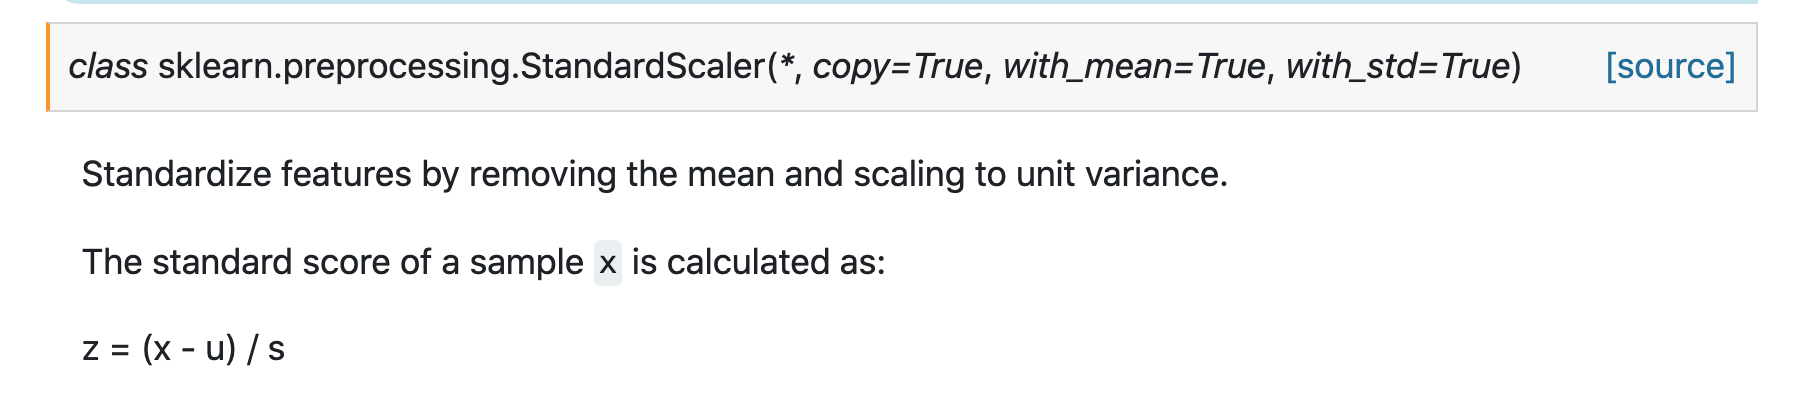

In [ ]:
from sklearn.preprocessing import StandardScaler

ds = df.copy()

# 나중에 클러스터 별 캠페인 반응률을 살펴보기 위해 사용
# 클러스터를 구성하기 위한 피쳐에서는 제거한다.
cols_del = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response']
ds = ds.drop(cols_del, axis=1)


In [ ]:
ds.head()

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Customer_For,Living_With,Children,Family_Size,Is_Parent,Age,Spent
0,0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,83894400000000000,0,0,1,0,64,1617
1,0,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,10800000000000000,0,2,3,1,67,27
2,0,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,40780800000000000,1,0,2,0,56,776
3,0,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,5616000000000000,1,1,3,1,37,53
4,1,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,27734400000000000,1,1,3,1,40,422


In [ ]:
#Scaling
scaler = StandardScaler()
scaler.fit(ds) # mean, variance 계산

# 적용
scaled_ds = pd.DataFrame(scaler.transform(ds), columns= ds.columns )
print("All features are now scaled")

All features are now scaled


In [ ]:
#Scaled data to be used for reducing the dimensionality
print("Dataframe to be used for further modelling:")
scaled_ds.head()

Dataframe to be used for further modelling:


,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Customer_For,Living_With,Children,Family_Size,Is_Parent,Age,Spent
0,-0.893586,0.287105,-0.822754,-0.929699,0.310353,0.977660,1.552041,1.690293,2.453472,1.483713,0.852576,0.351030,1.426865,2.503607,-0.555814,0.692181,1.973583,-1.349603,-1.264598,-1.758359,-1.581139,1.018352,1.676245
1,-0.893586,-0.260882,1.040021,0.908097,-0.380813,-0.872618,-0.637461,-0.718230,-0.651004,-0.634019,-0.733642,-0.168701,-1.126420,-0.571340,-1.171160,-0.132545,-1.665144,-1.349603,1.404572,0.449070,0.632456,1.274785,-0.963297
2,-0.893586,0.913196,-0.822754,-0.929699,-0.795514,0.357935,0.570540,-0.178542,1.339513,-0.147184,-0.037254,-0.688432,1.426865,-0.229679,1.290224,-0.544908,-0.172664,0.740959,-1.264598,-0.654644,-1.581139,0.334530,0.280110
3,-0.893586,-1.176114,1.040021,-0.929699,-0.795514,-0.872618,-0.561961,-0.655787,-0.504911,-0.585335,-0.752987,-0.168701,-0.761665,-0.913000,-0.555814,0.279818,-1.923210,0.740959,0.069987,0.449070,0.632456,-1.289547,-0.920135
4,0.571657,0.294307,1.040021,-0.929699,1.554453,-0.392257,0.419540,-0.218684,0.152508,-0.001133,-0.559545,1.390492,0.332600,0.111982,0.059532,-0.132545,-0.822130,0.740959,0.069987,0.449070,0.632456,-1.033114,-0.307562


- 여기까지 카테고리 데이터를 LabelEncoder 를 통해 숫자형으로 변환하기
- Scaler 를 사용하여 데이터를 정규화하는 방법을 배웠습니다 

----
⏰ "차원 축소" 수업 시작

## 💡 Dimension Reduction


- 앞의 상관계수 행렬에서 봤듯이, 서로 관련있는 피쳐들이 많음.
- 변수가 너무 많으면, 모델링이 적절하게 되지 않을 수 있음. 

In [ ]:
scaled_ds

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Customer_For,Living_With,Children,Family_Size,Is_Parent,Age,Spent
0,-0.893586,0.287105,-0.822754,-0.929699,0.310353,0.977660,1.552041,1.690293,2.453472,1.483713,0.852576,0.351030,1.426865,2.503607,-0.555814,0.692181,1.973583,-1.349603,-1.264598,-1.758359,-1.581139,1.018352,1.676245
1,-0.893586,-0.260882,1.040021,0.908097,-0.380813,-0.872618,-0.637461,-0.718230,-0.651004,-0.634019,-0.733642,-0.168701,-1.126420,-0.571340,-1.171160,-0.132545,-1.665144,-1.349603,1.404572,0.449070,0.632456,1.274785,-0.963297
2,-0.893586,0.913196,-0.822754,-0.929699,-0.795514,0.357935,0.570540,-0.178542,1.339513,-0.147184,-0.037254,-0.688432,1.426865,-0.229679,1.290224,-0.544908,-0.172664,0.740959,-1.264598,-0.654644,-1.581139,0.334530,0.280110
3,-0.893586,-1.176114,1.040021,-0.929699,-0.795514,-0.872618,-0.561961,-0.655787,-0.504911,-0.585335,-0.752987,-0.168701,-0.761665,-0.913000,-0.555814,0.279818,-1.923210,0.740959,0.069987,0.449070,0.632456,-1.289547,-0.920135
4,0.571657,0.294307,1.040021,-0.929699,1.554453,-0.392257,0.419540,-0.218684,0.152508,-0.001133,-0.559545,1.390492,0.332600,0.111982,0.059532,-0.132545,-0.822130,0.740959,0.069987,0.449070,0.632456,-1.033114,-0.307562
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2207,-0.893586,0.430444,-0.822754,0.908097,-0.104347,1.197084,0.419540,0.066770,0.079461,2.213965,3.928291,-0.168701,1.791619,0.111982,-0.555814,-0.132545,0.124112,0.740959,0.069987,0.449070,0.632456,0.163575,1.218061
2208,0.571657,0.560123,2.902796,0.908097,0.241237,0.298631,-0.662628,-0.611184,-0.687527,-0.658360,-0.694954,2.429954,1.426865,-0.229679,-0.248141,0.692181,-1.940414,0.740959,2.739158,2.656499,0.632456,1.958607,-0.271040
2209,-0.893586,0.233347,-0.822754,-0.929699,1.450778,1.787156,0.545373,0.222878,-0.103155,-0.366260,-0.385448,-0.688432,-0.761665,0.111982,2.213242,0.279818,-0.847936,-1.349603,-1.264598,-1.758359,-1.581139,-1.033114,1.052052
2210,0.571657,0.803172,-0.822754,0.908097,-1.417564,0.363866,0.092373,0.209498,0.773403,0.071892,0.330284,-0.168701,0.697355,0.795303,1.290224,-0.957271,-0.843635,0.740959,0.069987,0.449070,0.632456,1.103830,0.391336


In [ ]:
# PCA 로 3차원으로 데이터를 줄인다.
# sklearn 에서 PCA 모듈을 불러온다.
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca.fit(scaled_ds)
PCA_ds = pd.DataFrame(pca.transform(scaled_ds), columns=(["col1","col2", "col3"]))
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,2212.0,-5.802070e-17,2.878377,-5.969394,-2.538494,-0.780421,2.383290,7.444305
col2,2212.0,6.123292e-18,1.706839,-4.312186,-1.328320,-0.158130,1.242292,6.142729
col3,2212.0,3.463173e-18,1.221957,-3.531778,-0.828926,-0.022084,0.799204,6.618982


In [ ]:
PCA_ds.head()

,col1,col2,col3
0,4.994347,-0.151250,2.648578
1,-2.884455,-0.006677,-1.863873
2,2.617864,-0.720766,-0.253030
3,-2.676036,-1.541979,-0.922550
4,-0.649591,0.209852,-0.021311


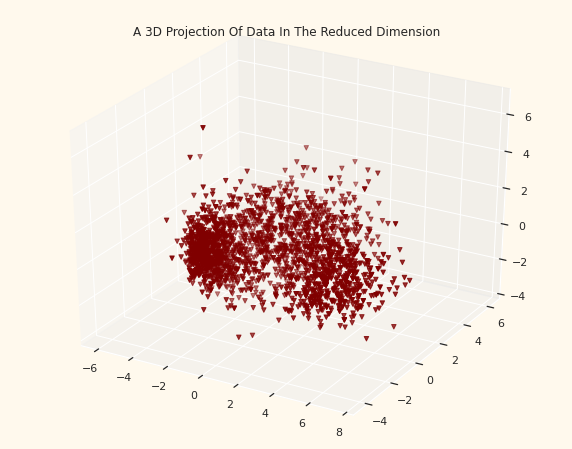

In [ ]:
#A 3D Projection Of Data In The Reduced Dimension
x =PCA_ds["col1"]
y =PCA_ds["col2"]
z =PCA_ds["col3"]

#3D 플랏 그리기
# https://www.python-graph-gallery.com/370-3d-scatterplot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="maroon", marker="v" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

----
⏰ "Clustering" 수업 시작

# 👣 유저 세그먼트 나누기: Clustering

클러스터링 하기 전 궁금증. 데이터를 몇 개로 나눠야 할까?!

## 💡 Elbow Method 

데이터를 몇 개로 나눠야 할까?

* Elbow Method 

- WSS(군집 내 분산)은 작을 수록 군집의 중심에 많이 모여있는 것이므로 WSS(군집 내 분산)이 작을 수록 좋다. 
- 하지만 클러스터를 늘려서 더 이상 작아지지 않는 한계점이 있다면 더 이상 클러스터 수를 증가시키지 않아도 좋다.



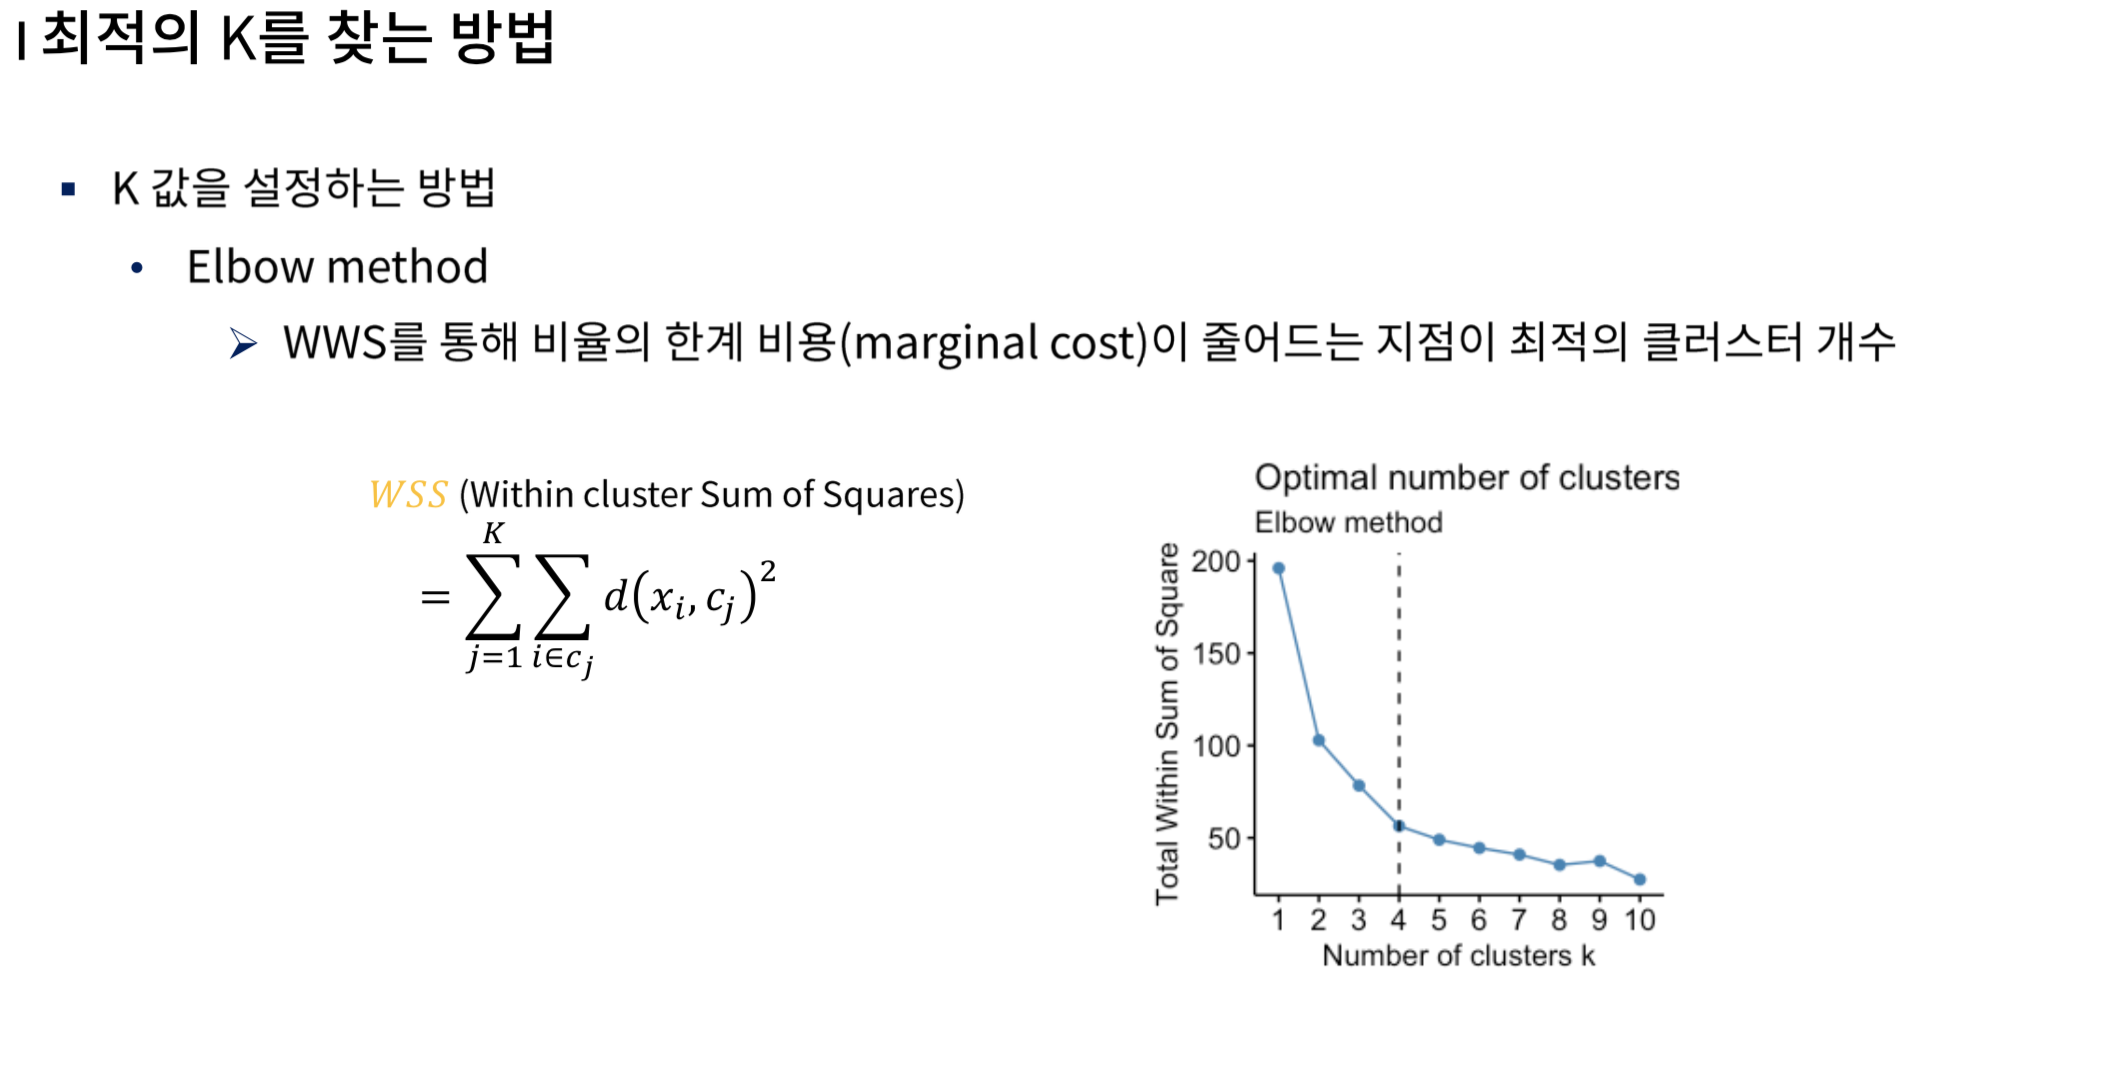

In [ ]:
# 이미지 출처: https://heung-bae-lee.github.io/2020/05/30/machine_learning_19/

In [ ]:
from sklearn.cluster import KMeans

In [ ]:

# Quick examination of elbow method to find numbers of clusters to make.
print('Elbow Method to determine the number of clusters to be formed:')

distortions = []

# 클러스터 개수 1 ~ 10 까지 늘려보면서
# 클러스터 내 거리합을 저장한다.
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(PCA_ds)
    distortions.append(kmeanModel.inertia_) # within-cluster sum-of-squares criterion

Elbow Method to determine the number of clusters to be formed:


In [ ]:
distortions

[28060.97297931257,
 13841.124775000442,
 9625.213915951786,
 7482.644960460693,
 6591.104027365587,
 5885.337016864823,
 5320.387181942987,
 4869.814078144125,
 4552.75847518368]

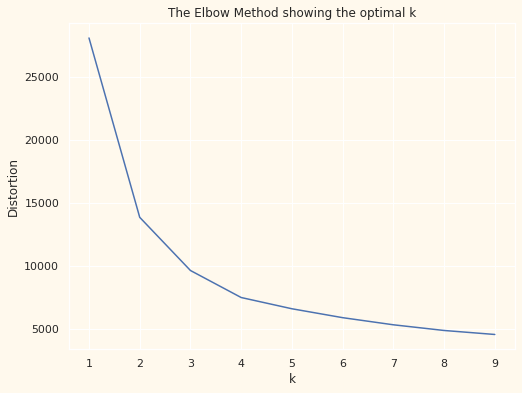

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(K, distortions)
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()
## 4개의 군집으로 clustering 하자!

클러스터링을 해보자! 
- 여기서는 Hierarchical Clustering 을 먼저 적용해 보았다.

In [ ]:
from sklearn.cluster import AgglomerativeClustering


# 유사도 기준: affinity = euclidean
AC = AgglomerativeClustering(n_clusters=4,affinity='euclidean')

# fit model and predict clusters
yhat_AC = AC.fit_predict(PCA_ds)
PCA_ds["Clusters"] = yhat_AC
# 기존 데이터에도 넣는다.
df["Clusters"]= yhat_AC

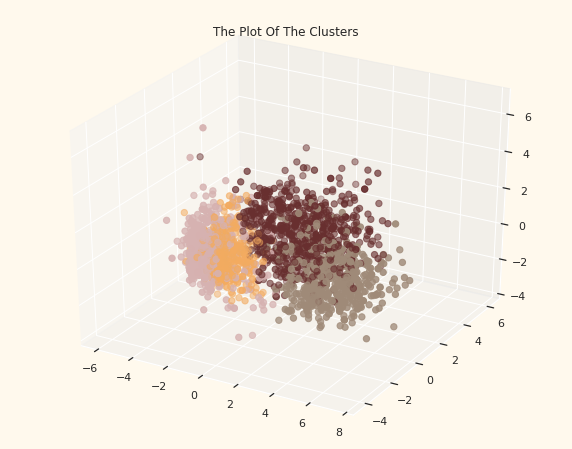

In [ ]:
#Plotting the clusters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PCA_ds["Clusters"], marker='o', cmap = cmap )
ax.set_title("The Plot Of The Clusters")
plt.show()

# 👣 모델 평가하기: Evaluation

EDA 를 통해 만들어진 클러스터와 그 특성 파악하기

그룹이 골고루 분포되어 있을까?

In [ ]:
df.head()

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Customer_For,Living_With,Children,Family_Size,Is_Parent,Age,Spent,Clusters
0,0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,83894400000000000,0,0,1,0,64,1617,2
1,0,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,10800000000000000,0,2,3,1,67,27,3
2,0,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,40780800000000000,1,0,2,0,56,776,2
3,0,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,5616000000000000,1,1,3,1,37,53,1
4,1,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,27734400000000000,1,1,3,1,40,422,0


In [ ]:
df['Clusters'].value_counts()

0    708
1    580
2    487
3    437
Name: Clusters, dtype: int64

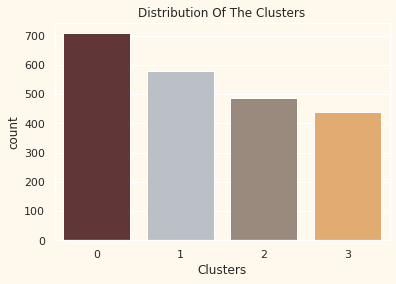

In [ ]:
#Plotting countplot of clusters
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
pl = sns.countplot(x=df["Clusters"], palette=pal)
pl.set_title("Distribution Of The Clusters")
plt.show()


클러스터 별 구매금액과 연간 수입을 알아보자

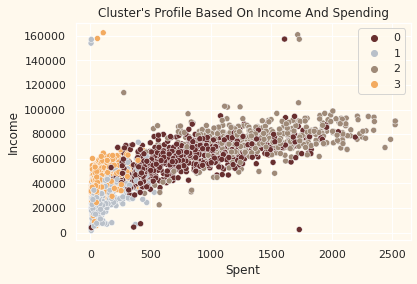

In [ ]:
pl = sns.scatterplot(data = df,x=df["Spent"], y=df["Income"],hue=df["Clusters"], palette= pal)
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()


# group ?: high spending & low income (3)
# group ?: low spending & low income (1)
# group ?: high spending & average income (0)
# group ?: high spending & high income (2)


구매를 많이하는 고객층은?

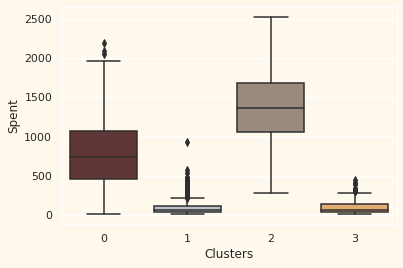

In [ ]:
pl=sns.boxplot(x=df["Clusters"], y=df["Spent"], palette=pal)

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 55.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 83.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 36.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 81.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


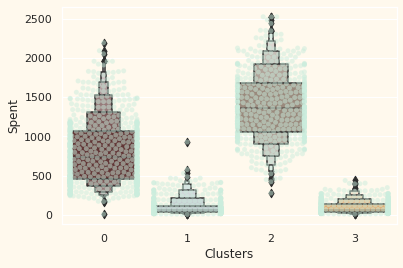

In [ ]:
plt.figure()
pl=sns.swarmplot(x=df["Clusters"], y=df["Spent"], color= "#CBEDDD", alpha=0.5 )
pl=sns.boxenplot(x=df["Clusters"], y=df["Spent"], palette=pal)

어떤 클러스터에서 캠페인 반응이 높을까?

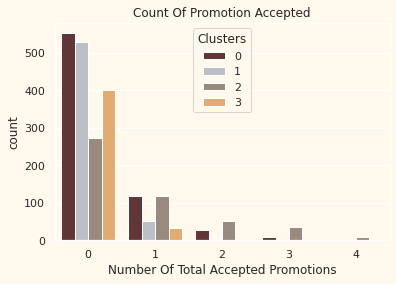

In [ ]:
#Creating a feature to get a sum of accepted promotions 
df["Total_Promos"] = df["AcceptedCmp1"]+ df["AcceptedCmp2"]+ df["AcceptedCmp3"]+ df["AcceptedCmp4"]+ df["AcceptedCmp5"]
#Plotting count of total campaign accepted.
plt.figure()
pl = sns.countplot(x=df["Total_Promos"],hue=df["Clusters"], palette= pal)
pl.set_title("Count Of Promotion Accepted")
pl.set_xlabel("Number Of Total Accepted Promotions")
plt.show()

# 대부분 반응을 하지 않았다. 프로모션이 더 잘 디자인 될 필요가 있다.

할인에 잘 반응한 그룹은?

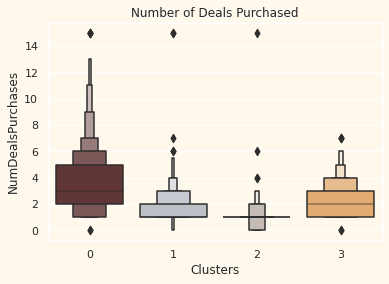

In [ ]:
#Plotting the number of deals purchased
plt.figure()
pl=sns.boxenplot(y=df["NumDealsPurchases"],x=df["Clusters"], palette= pal)
pl.set_title("Number of Deals Purchased")
plt.show()

가족 구성원과 나이대는 어떻게 될까?

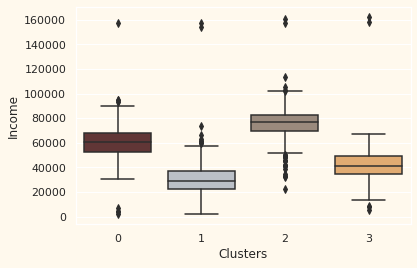

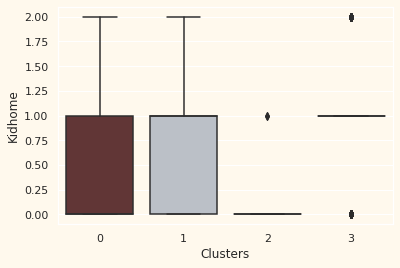

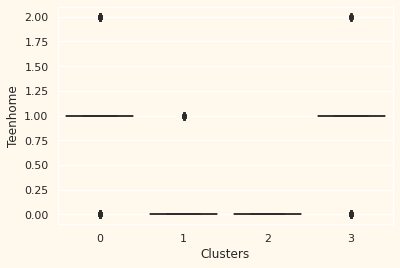

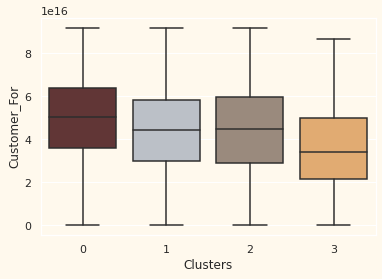

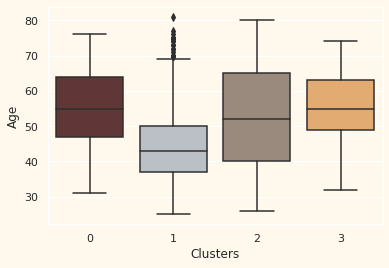

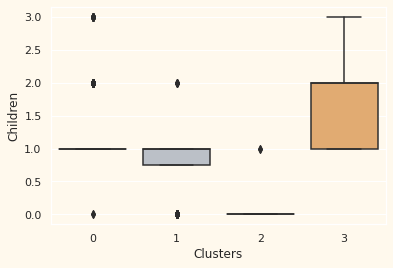

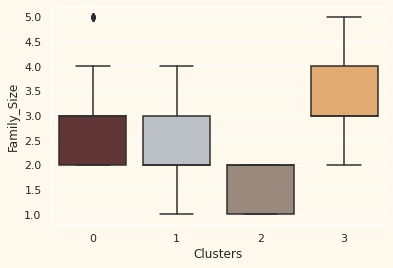

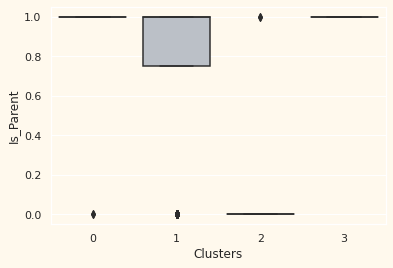

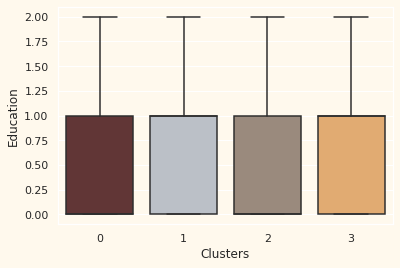

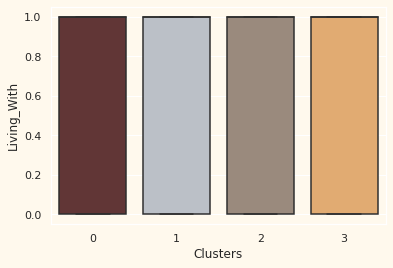

In [ ]:
Personal = [ "Income","Kidhome","Teenhome","Customer_For", "Age", "Children", "Family_Size", "Is_Parent", "Education","Living_With"]

for i in Personal:
    plt.figure()
    sns.boxplot(y=df[i], x=df["Clusters"], palette=pal)
    plt.show()

In [ ]:
# 부모이며, 가족 구성원이 2 -4, 한부모 가정, 10대, 비교적 나이가 있음
# 부모가 아니며, 많아도 2명정도의 가족 구성원, 전 연령에 골고루 있음, 연간 수입이 높음
# 대부분 부모이며, 최대 4명의 가족 구성원, 10대가 아닌 1명의 어린 아이를 두고 있음, 상대적으로 어림
# 부모이며, 최대 5명까지의 가족 구성원, 상대적으로 나이가 있고, 수입이 낮음

# 👣 다양한 클러스터링 모델 사용해보기

## 💡Density Based Clustering

In [ ]:
from sklearn.cluster import DBSCAN
#Initiating the DBSCAN Clustering model 
DP = DBSCAN(eps=0.30, min_samples=9)
# fit model and predict clusters
DP_df = DP.fit_predict(PCA_ds)
PCA_ds["DBSCAN_Clusters"] = DP_df
#Adding the Clusters feature to the orignal dataframe.
df["DBSCAN_Clusters"]= DP_df

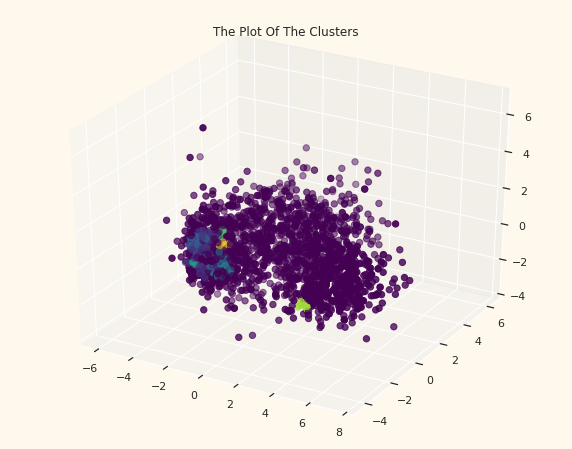

In [ ]:
#Plotting the clusters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PCA_ds["DBSCAN_Clusters"], marker='o', cmap = 'viridis' )
ax.set_title("The Plot Of The Clusters")
plt.show()

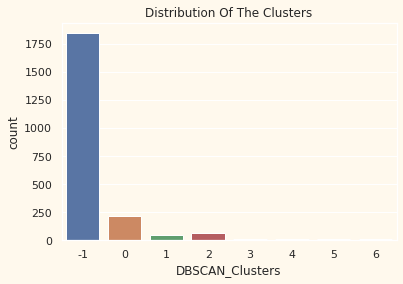

In [ ]:
#Plotting countplot of clusters
pl = sns.countplot(x=df["DBSCAN_Clusters"])
pl.set_title("Distribution Of The Clusters")
plt.show()

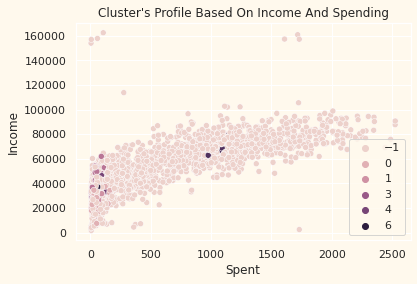

In [ ]:
pl = sns.scatterplot(data = df,x=df["Spent"], y=df["Income"],hue=df["DBSCAN_Clusters"])
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 86.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 90.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 74.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 79.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 30.0% of the points cannot be placed; y

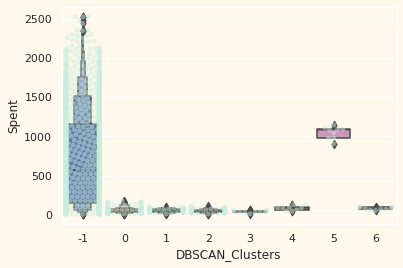

In [ ]:
plt.figure()
pl=sns.swarmplot(x=df["DBSCAN_Clusters"], y=df["Spent"], color= "#CBEDDD", alpha=0.5 )
pl=sns.boxenplot(x=df["DBSCAN_Clusters"], y=df["Spent"])
plt.show()

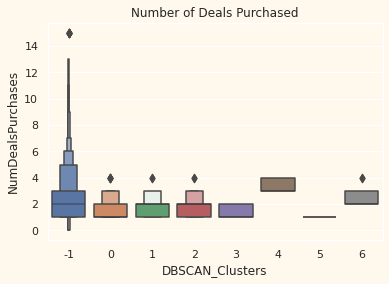

In [ ]:
#Plotting the number of deals purchased
plt.figure()
pl=sns.boxenplot(y=df["NumDealsPurchases"],x=df["DBSCAN_Clusters"])
pl.set_title("Number of Deals Purchased")
plt.show()

## DBSCAN으로는 clustreing이 제대로 되지 않는다는 것을 알 수 있음.

## 💡Partition Based Clustering

In [ ]:
Kmeans = KMeans(n_clusters=4)
# fit model and predict clusters
Kmeans_df = Kmeans.fit_predict(PCA_ds)
PCA_ds["Kmeans_Clusters"] = Kmeans_df
#Adding the Clusters feature to the orignal dataframe.
df["Kmeans_Clusters"]= Kmeans_df

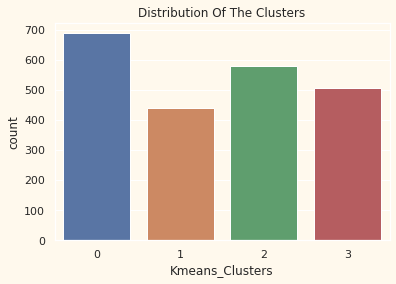

In [ ]:
#Plotting countplot of clusters
pl = sns.countplot(x=df["Kmeans_Clusters"])
pl.set_title("Distribution Of The Clusters")
plt.show()

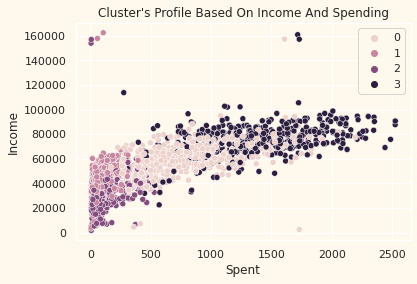

In [ ]:
pl = sns.scatterplot(data = df,x=df["Spent"], y=df["Income"],hue=df["Kmeans_Clusters"])
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

## 💡 Silhouette Coefficient

In [ ]:
from sklearn.metrics import silhouette_samples

# Hierachical
sample_silhouette_values = silhouette_samples(PCA_ds, PCA_ds["Clusters"])
print("Hierachical",sample_silhouette_values.mean())

# Density - DBSCAN
sample_silhouette_values = silhouette_samples(PCA_ds, PCA_ds["DBSCAN_Clusters"])
print("Density",sample_silhouette_values.mean())


# Kmeans
sample_silhouette_values = silhouette_samples(PCA_ds, PCA_ds["Kmeans_Clusters"])
print("Kmeans",sample_silhouette_values.mean())


Hierachical 0.45426727160150715
Density 0.032787633412139
Kmeans 0.46085699451204815
